In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#%cd /content/drive/My Drive/Colab Notebooks/

In [4]:
df = pd.read_parquet("/Users/ironfeast/Desktop/projectDM/Project-kumar13-wcutchin-dutiwar/202304.parquet")

In [5]:
#df = pd.read_parquet(r'/Users/ironfeast/Desktop/project/data/202304.parquet')
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,None,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,None,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,None,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,None,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,None,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A


In [6]:
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df = df.loc[df.index[(df.Date_of_Transfer.dt.year>=2015)&(df.Date_of_Transfer.dt.year<=2022)]].copy()
df['year'] = df['Date_of_Transfer'].dt.year
df['month'] = df['Date_of_Transfer'].dt.month

In [7]:
def sample_data(data, fraction=0.15):
    sampled_data = data.groupby(['year', 'month']).apply(lambda x: x.sample(frac=fraction))
    return sampled_data
sampling_fraction = 0.15

In [8]:
sampled_df = sample_data(df, fraction=sampling_fraction)
sampled_df.shape

(1219509, 18)

In [9]:
sampled_df.reset_index(drop=True,inplace=True)

In [10]:
sampled_df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},285000,2015-01-09,PO5 2PR,T,N,F,66,None,WAVERLEY ROAD,None,SOUTHSEA,PORTSMOUTH,PORTSMOUTH,A,A,2015,1
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},182000,2015-01-30,EX4 7BX,T,N,F,68,None,CHAUCER GROVE,None,EXETER,EXETER,DEVON,A,A,2015,1
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},105000,2015-01-12,NR10 3HY,F,N,L,33,None,WEAVERS CLOSE,HORSHAM ST FAITH,NORWICH,BROADLAND,NORFOLK,A,A,2015,1
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},180000,2015-01-29,BN17 5PE,T,N,F,32,None,NORFOLK GARDENS,None,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2015,1
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},120000,2015-01-08,LA4 6DL,F,N,L,23,None,CLARENCE COURT,None,MORECAMBE,LANCASTER,LANCASHIRE,A,A,2015,1


In [11]:
# #df.shape
# df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
# df = df.loc[df.index[(df.Date_of_Transfer.dt.year>=2018)&(df.Date_of_Transfer.dt.year<=2018)]].copy()

In [12]:
df = sampled_df.copy()
del sampled_df
df.describe()


,price,year,month
count,1.219509e+06,1.219509e+06,1.219509e+06
mean,3.506384e+05,2.018455e+03,6.707891e+00
std,1.357550e+06,2.272350e+00,3.409931e+00
min,1.000000e+00,2.015000e+03,1.000000e+00
25%,1.500000e+05,2.016000e+03,4.000000e+00
50%,2.350000e+05,2.018000e+03,7.000000e+00
75%,3.700000e+05,2.021000e+03,1.000000e+01
max,3.034700e+08,2.022000e+03,1.200000e+01


In [13]:
df.price.min()

1

In [14]:
df.price.max()

303470000

In [15]:
df.price.describe()

count    1.219509e+06
mean     3.506384e+05
std      1.357550e+06
min      1.000000e+00
25%      1.500000e+05
50%      2.350000e+05
75%      3.700000e+05
max      3.034700e+08
Name: price, dtype: float64

In [16]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price,year,month
count,1219509.00,1219509.00,1219509.00
mean,350638.41,2018.45,6.71
std,1357550.47,2.27,3.41
min,1.00,2015.00,1.00
25%,150000.00,2016.00,4.00
50%,235000.00,2018.00,7.00
75%,370000.00,2021.00,10.00
max,303470000.00,2022.00,12.00


In [17]:
df.price[round(df.price)==1].shape

(1,)

In [18]:
df.drop(df.index[(round(df.price)==1)],inplace=True)#.price.describe()#.apply(lambda s: s.apply('{0:.2f}'.format))
df.shape

(1219508, 18)

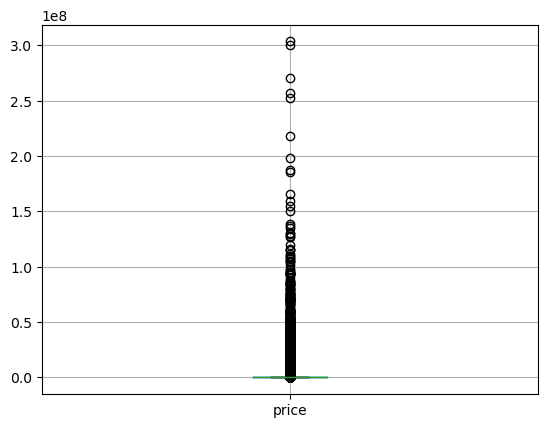

In [19]:
# fig, axs = plt.subplots(1, 1)
# basic plot
df.boxplot(column='price')
plt.show()

# # notched plot
# axs[0, 1].boxplot(data, 1)
# axs[0, 1].set_title('notched plot')

In [20]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price,year,month
count,1219508.00,1219508.00,1219508.00
mean,350638.70,2018.45,6.71
std,1357550.99,2.27,3.41
min,100.00,2015.00,1.00
25%,150000.00,2016.00,4.00
50%,235000.00,2018.00,7.00
75%,370000.00,2021.00,10.00
max,303470000.00,2022.00,12.00


In [21]:
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df['year'] = df.Date_of_Transfer.dt.year
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year',
       'month'],
      dtype='object')

<Axes: xlabel='year', ylabel='price'>

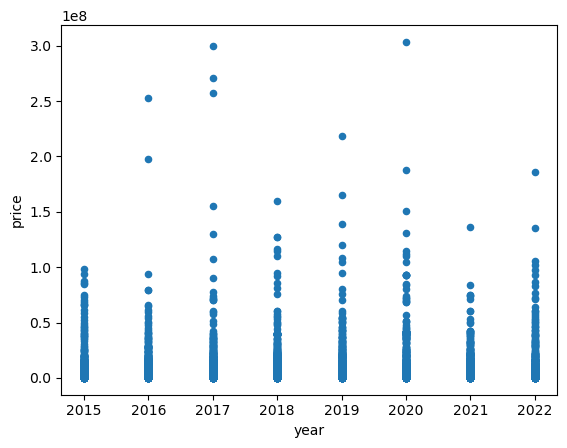

In [22]:
df.plot(y = 'price',x='year',kind='scatter')

In [23]:
df.price[round(df.price)<=1000].shape

(1266,)

In [24]:
df.price[round(df.price)>=10000000].shape

(1397,)

In [25]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].shape

(1213124,)

In [26]:
df.price[((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

5899625.8062343355

In [27]:
df.price.mean()

350638.69975514716

In [28]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

321437.45265446894

In [29]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},285000,2015-01-09,PO5 2PR,T,N,F,66,None,WAVERLEY ROAD,None,SOUTHSEA,PORTSMOUTH,PORTSMOUTH,A,A,2015,1
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},182000,2015-01-30,EX4 7BX,T,N,F,68,None,CHAUCER GROVE,None,EXETER,EXETER,DEVON,A,A,2015,1
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},105000,2015-01-12,NR10 3HY,F,N,L,33,None,WEAVERS CLOSE,HORSHAM ST FAITH,NORWICH,BROADLAND,NORFOLK,A,A,2015,1
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},180000,2015-01-29,BN17 5PE,T,N,F,32,None,NORFOLK GARDENS,None,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2015,1
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},120000,2015-01-08,LA4 6DL,F,N,L,23,None,CLARENCE COURT,None,MORECAMBE,LANCASTER,LANCASHIRE,A,A,2015,1


In [30]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'})

,price
year,
2015,279131.058467
2016,292826.138756
2017,312546.561638
2018,313619.127792
2019,314151.954493
2020,337288.720218
2021,355616.565468
2022,370086.803812


<Axes: xlabel='year'>

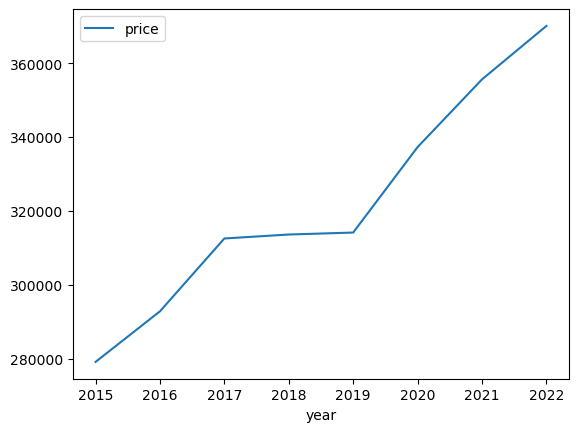

In [31]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'}).plot(kind='line')

In [32]:
print(df[((round(df.price)>=5000)&(round(df.price)<80000))].shape) # Base low
print(df[((round(df.price)>=80000)&(round(df.price)<150000))].shape) # Low
print(df[((round(df.price)>=150000)&(round(df.price)<300000))].shape) # Moderate
print(df[((round(df.price)>=300000)&(round(df.price)<=10000000))].shape) # High

(70576, 18)
(230005, 18)
(478203, 18)
(436562, 18)


In [33]:
print(6474632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))])) #
print(7688632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(9092500/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(4986399/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))

5.329634617347526
6.328946458616636
7.484549354810032
4.104586133436941


In [34]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'min'})

,price
year,
2015,10500
2016,10039
2017,10202
2018,10101
2019,10125
2020,10200
2021,10250
2022,10100


In [35]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},285000,2015-01-09,PO5 2PR,T,N,F,66,None,WAVERLEY ROAD,None,SOUTHSEA,PORTSMOUTH,PORTSMOUTH,A,A,2015,1
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},182000,2015-01-30,EX4 7BX,T,N,F,68,None,CHAUCER GROVE,None,EXETER,EXETER,DEVON,A,A,2015,1
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},105000,2015-01-12,NR10 3HY,F,N,L,33,None,WEAVERS CLOSE,HORSHAM ST FAITH,NORWICH,BROADLAND,NORFOLK,A,A,2015,1
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},180000,2015-01-29,BN17 5PE,T,N,F,32,None,NORFOLK GARDENS,None,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2015,1
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},120000,2015-01-08,LA4 6DL,F,N,L,23,None,CLARENCE COURT,None,MORECAMBE,LANCASTER,LANCASHIRE,A,A,2015,1


In [36]:
df.loc[df.index[((round(df.price)>=5000)&(round(df.price)<150000))],'Flag']= 'Low'
df.loc[df.index[((round(df.price)>=150000)&(round(df.price)<270000))],'Flag']= 'Medium' # Low
df.loc[df.index[((round(df.price)>=270000)&(round(df.price)<400000))],'Flag']= 'High' # Moderate
df.loc[df.index[((round(df.price)>=400000)&(round(df.price)<=10000000))],'Flag']= 'Very High' # High

In [37]:
df.Flag.value_counts(dropna=False)

Medium       402628
Low          300581
Very High    260254
High         251883
NaN            4162
Name: Flag, dtype: int64

In [38]:
df[df.Flag.isnull()].head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month,Flag
300,{21E5FEB7-1B45-2439-E050-A8C06205342E},87459419,2015-01-09,M3 3EB,O,N,L,3,UNIT 1,HARDMAN SQUARE,None,MANCHESTER,MANCHESTER,GREATER MANCHESTER,B,A,2015,1,NaN
1218,{21E5FEB7-03F9-2439-E050-A8C06205342E},19972500,2015-01-29,SO40 3ND,O,N,L,TESTWOOD HOTEL,None,SALSBURY ROAD,TOTTON,SOUTHAMPTON,NEW FOREST,HAMPSHIRE,B,A,2015,1,NaN
2730,{21E5FEB7-915A-2439-E050-A8C06205342E},54900000,2015-01-19,W6 7EF,O,N,F,"ELMS HOUSE, 43",None,BROOK GREEN,None,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,B,A,2015,1,NaN
3561,{21E5FEB7-01BE-2439-E050-A8C06205342E},1950,2015-01-24,LS2 7JF,O,N,L,LEEMING HOUSE,None,VICAR LANE,None,LEEDS,LEEDS,WEST YORKSHIRE,B,A,2015,1,NaN
4817,{21E5FEB7-6483-2439-E050-A8C06205342E},25996999,2015-01-08,None,O,N,F,G PARK,PLOT 1,DOCKHAM WAY,CRICK,NORTHAMPTON,DAVENTRY,NORTHAMPTONSHIRE,B,A,2015,1,NaN


In [39]:
# print(df.shape)
# dfwithoutNaN = df.dropna(subset=['Flag'])
# print(dfwithoutNaN.shape)

In [40]:
# print(dfwithoutNaN.Flag.value_counts(dropna=False))
# del dfwithoutNaN

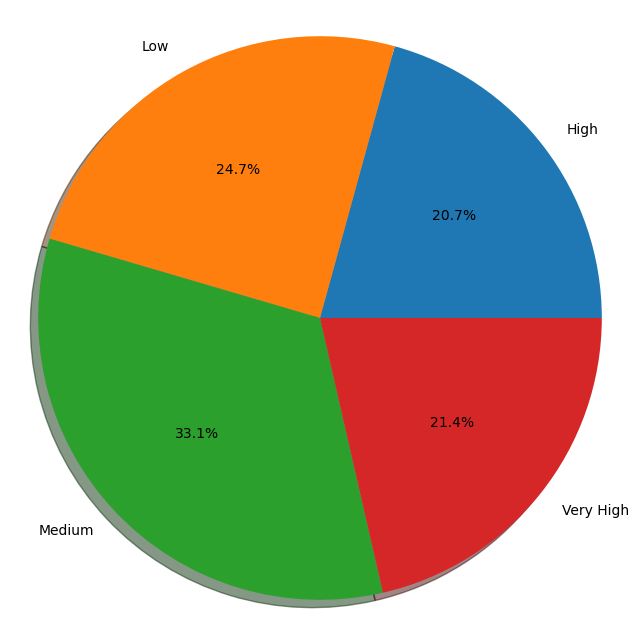

In [41]:

labels = df['Flag'].astype('category').cat.categories. tolist()
counts = df['Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [42]:
#from pandas_visual_analysis import VisualAnalysis
print(df.columns)
df.dtypes

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year',
       'month', 'Flag'],
      dtype='object')


Transaction_unique_identifier                object
price                                         int64
Date_of_Transfer                     datetime64[ns]
postcode                                     object
Property_Type                                object
Old/New                                      object
Duration                                     object
PAON                                         object
SAON                                         object
Street                                       object
Locality                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory_Type                             object
Record_Status - monthly_file_only            object
year                                          int64
month                                         int64
Flag                                         object
dtype: objec

In [43]:
df.nunique()

Transaction_unique_identifier        1219508
price                                  38894
Date_of_Transfer                        2820
postcode                              628464
Property_Type                              5
Old/New                                    2
Duration                                   2
PAON                                  100742
SAON                                   11979
Street                                202341
Locality                               17466
Town/City                               1148
District                                 361
County                                   117
PPDCategory_Type                           2
Record_Status - monthly_file_only          1
year                                       8
month                                     12
Flag                                       4
dtype: int64

In [44]:
print(df.shape)
print(df.Locality.nunique())
df.Locality.value_counts(dropna=False).head()

(1219508, 19)
17466


None         761161
MIDDLETON      1227
SHIRLEY        1137
WORSLEY        1097
KINGSWOOD      1000
Name: Locality, dtype: int64

In [45]:
df.PPDCategory_Type.value_counts(dropna=False)

A    1047831
B     171677
Name: PPDCategory_Type, dtype: int64

In [46]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month,Flag
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},285000,2015-01-09,PO5 2PR,T,N,F,66,None,WAVERLEY ROAD,None,SOUTHSEA,PORTSMOUTH,PORTSMOUTH,A,A,2015,1,High
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},182000,2015-01-30,EX4 7BX,T,N,F,68,None,CHAUCER GROVE,None,EXETER,EXETER,DEVON,A,A,2015,1,Medium
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},105000,2015-01-12,NR10 3HY,F,N,L,33,None,WEAVERS CLOSE,HORSHAM ST FAITH,NORWICH,BROADLAND,NORFOLK,A,A,2015,1,Low
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},180000,2015-01-29,BN17 5PE,T,N,F,32,None,NORFOLK GARDENS,None,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2015,1,Medium
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},120000,2015-01-08,LA4 6DL,F,N,L,23,None,CLARENCE COURT,None,MORECAMBE,LANCASTER,LANCASHIRE,A,A,2015,1,Low


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Street_encoded'] = label_encoder.fit_transform(df['Street'])
df['Locality_encoded'] = label_encoder.fit_transform(df['Locality'])
df['Town/City_encoded'] = label_encoder.fit_transform(df['Town/City'])
df['District_encoded'] = label_encoder.fit_transform(df['District'])
df['County_encoded'] = label_encoder.fit_transform(df['County'])

df['postcode_encoded'] = label_encoder.fit_transform(df['postcode'])
df['Property_Type_encoded'] = label_encoder.fit_transform(df['Property_Type'])
df['Old/New_encoded'] = label_encoder.fit_transform(df['Old/New'])
df['Duration_encoded'] = label_encoder.fit_transform(df['Duration'])
df['PAON_encoded'] = label_encoder.fit_transform(df['PAON'])
df['SAON_encoded'] = label_encoder.fit_transform(df['SAON'])
df['PPDCategory_Type_encoded'] = label_encoder.fit_transform(df['PPDCategory_Type'])

In [48]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,postcode_encoded,Property_Type_encoded,Old/New_encoded,Duration_encoded,PAON_encoded,SAON_encoded,PPDCategory_Type_encoded
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},285000,2015-01-09,PO5 2PR,T,N,F,66,None,WAVERLEY ROAD,None,SOUTHSEA,PORTSMOUTH,PORTSMOUTH,A,A,2015,1,High,190968,17466,919,225,77,424508,4,0,0,4555,11979,0
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},182000,2015-01-30,EX4 7BX,T,N,F,68,None,CHAUCER GROVE,None,EXETER,EXETER,DEVON,A,A,2015,1,Medium,35699,17466,367,116,33,193088,4,0,0,4617,11979,0
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},105000,2015-01-12,NR10 3HY,F,N,L,33,None,WEAVERS CLOSE,HORSHAM ST FAITH,NORWICH,BROADLAND,NORFOLK,A,A,2015,1,Low,191261,7533,733,36,65,372884,1,0,1,2938,11979,0
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},180000,2015-01-29,BN17 5PE,T,N,F,32,None,NORFOLK GARDENS,None,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2015,1,Medium,129013,17466,575,3,107,53069,4,0,0,2883,11979,0
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},120000,2015-01-08,LA4 6DL,F,N,L,23,None,CLARENCE COURT,None,MORECAMBE,LANCASTER,LANCASHIRE,A,A,2015,1,Low,38386,17466,689,168,52,266793,1,0,1,2140,11979,0


In [49]:
df.PAON.unique()[:]

array(['66', '68', '33', ..., 'REAR VIEW', 'ROSE COTTAGE, 131',
       'PLOT 1200'], dtype=object)

In [50]:
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year',
       'month', 'Flag', 'Street_encoded', 'Locality_encoded',
       'Town/City_encoded', 'District_encoded', 'County_encoded',
       'postcode_encoded', 'Property_Type_encoded', 'Old/New_encoded',
       'Duration_encoded', 'PAON_encoded', 'SAON_encoded',
       'PPDCategory_Type_encoded'],
      dtype='object')

In [51]:
df.dtypes

Transaction_unique_identifier                object
price                                         int64
Date_of_Transfer                     datetime64[ns]
postcode                                     object
Property_Type                                object
Old/New                                      object
Duration                                     object
PAON                                         object
SAON                                         object
Street                                       object
Locality                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory_Type                             object
Record_Status - monthly_file_only            object
year                                          int64
month                                         int64
Flag                                         object
Street_encod

In [52]:
df['Record_Status - monthly_file_only'].unique()

array(['A'], dtype=object)

In [53]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['PAON'] = df['PAON'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
# df['SAON'] = df['SAON'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
# # 'Property_Type', 'Old/New', 'Duration', 'PPDCategory_Type'
# df['Property_Type'] = df['Property_Type'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
# df['Old/New'] = df['Old/New'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
# df['Duration'] = df['Duration'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
# df['PPDCategory_Type'] = df['PPDCategory_Type'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)

In [54]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,month,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,postcode_encoded,Property_Type_encoded,Old/New_encoded,Duration_encoded,PAON_encoded,SAON_encoded,PPDCategory_Type_encoded
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},285000,2015-01-09,PO5 2PR,T,N,F,66,None,WAVERLEY ROAD,None,SOUTHSEA,PORTSMOUTH,PORTSMOUTH,A,A,2015,1,High,190968,17466,919,225,77,424508,4,0,0,4555,11979,0
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},182000,2015-01-30,EX4 7BX,T,N,F,68,None,CHAUCER GROVE,None,EXETER,EXETER,DEVON,A,A,2015,1,Medium,35699,17466,367,116,33,193088,4,0,0,4617,11979,0
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},105000,2015-01-12,NR10 3HY,F,N,L,33,None,WEAVERS CLOSE,HORSHAM ST FAITH,NORWICH,BROADLAND,NORFOLK,A,A,2015,1,Low,191261,7533,733,36,65,372884,1,0,1,2938,11979,0
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},180000,2015-01-29,BN17 5PE,T,N,F,32,None,NORFOLK GARDENS,None,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2015,1,Medium,129013,17466,575,3,107,53069,4,0,0,2883,11979,0
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},120000,2015-01-08,LA4 6DL,F,N,L,23,None,CLARENCE COURT,None,MORECAMBE,LANCASTER,LANCASHIRE,A,A,2015,1,Low,38386,17466,689,168,52,266793,1,0,1,2140,11979,0


In [55]:
# Transaction_unique_identifier                object --> Not required for modelling
# price                                         int64 --> Price is not required as we are trying to predict the category without knowing the actual price
# Date_of_Transfer                     datetime64[ns] --> Year is required
# postcode                                     object --> post code is also required
# PAON                                         object --> Primary Addressable Object Name, as of now checking on this if this is required for modelling
# SAON                                         object --> Secondary Addressable Object Name seems to be not required but will check with this.
# Street                                       object --> Street is required as it may have some waitage.
# Locality                                     object --> May be this is a required column
# Town/City                                    object --> This is required columns
# District                                     object --> This is also a required field
# County                                       object --> required
# Record_Status - monthly_file_only            object --> It has only one value which would not give any information.
# year                                          int64 --> Derived from Date of transfer
# Flag                                         object --> Derived from Price field.
# Street_encoded                                int64 --> R
# Locality_encoded                              int64 --> R as of now
# Town/City_encoded                             int64 --> R
# District_encoded                              int64 --> R
# County_encoded                                int64 --> R
# Property_Type_D                               uint8 --> R
# Property_Type_F                               uint8 --> R
# Property_Type_O                               uint8 --> R
# Property_Type_S                               uint8 --> R
# Property_Type_T                               uint8 --> R
# Old/New_N                                     uint8 --> R
# Old/New_Y                                     uint8 --> R
# Duration_F                                    uint8 --> R
# Duration_L                                    uint8 --> R
# Duration_U                                    uint8 --> R
# PPDCategory_Type_A                            uint8 --> R
# PPDCategory_Type_B                            uint8 --> R

## we are going to take the columns [year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,
##                                   County_encoded,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,
##                                   Property_Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,
##                                   PPDCategory_Type_A,PPDCategory_Type_B]



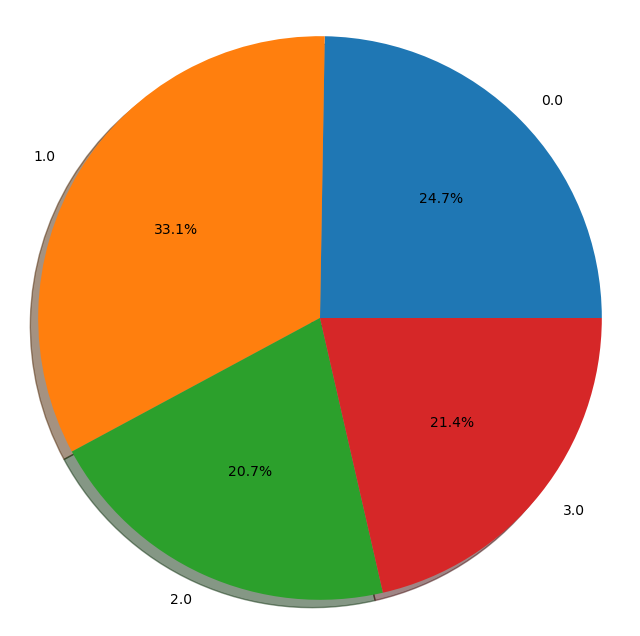

In [56]:
# manual ordinal encoding the target variable
df.loc[df.index[(df.Flag=='Low')],'Target_Flag']= 0
df.loc[df.index[(df.Flag=='Medium')],'Target_Flag']= 1
df.loc[df.index[(df.Flag=='High')],'Target_Flag']= 2
df.loc[df.index[(df.Flag=='Very High')],'Target_Flag']= 3

labels = df['Target_Flag'].astype('category').cat.categories. tolist()
counts = df['Target_Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [57]:
#df.columns

In [58]:
df1 = df[['Transaction_unique_identifier', 'year','month',                      #df.loc[df.index[(df.year>=2018)&(df.year<=2018)]]
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded','postcode_encoded', 'Property_Type_encoded',
       'Old/New_encoded', 'Duration_encoded','PAON_encoded','SAON_encoded','PPDCategory_Type_encoded',
       'Target_Flag']].copy()

del df

In [59]:
df1.head()

,Transaction_unique_identifier,year,month,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,postcode_encoded,Property_Type_encoded,Old/New_encoded,Duration_encoded,PAON_encoded,SAON_encoded,PPDCategory_Type_encoded,Target_Flag
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},2015,1,190968,17466,919,225,77,424508,4,0,0,4555,11979,0,2.0
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},2015,1,35699,17466,367,116,33,193088,4,0,0,4617,11979,0,1.0
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},2015,1,191261,7533,733,36,65,372884,1,0,1,2938,11979,0,0.0
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},2015,1,129013,17466,575,3,107,53069,4,0,0,2883,11979,0,1.0
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},2015,1,38386,17466,689,168,52,266793,1,0,1,2140,11979,0,0.0


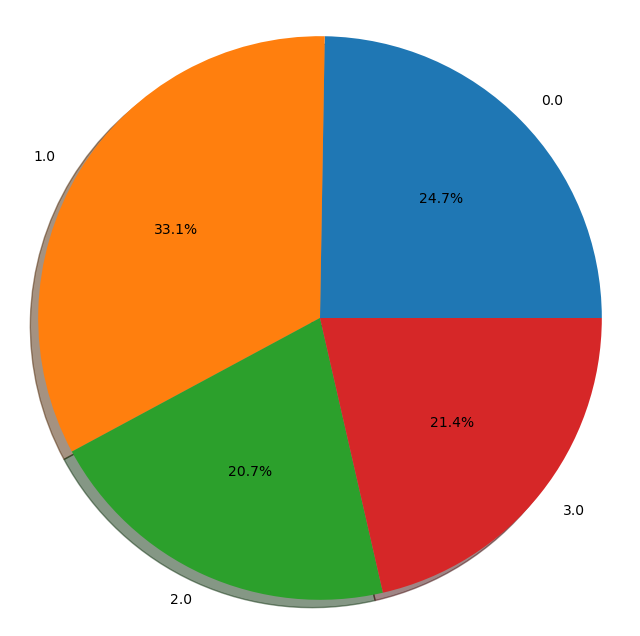

In [60]:
labels = df1['Target_Flag'].astype('category').cat.categories.tolist()
counts = df1['Target_Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [61]:
df1.head()

,Transaction_unique_identifier,year,month,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,postcode_encoded,Property_Type_encoded,Old/New_encoded,Duration_encoded,PAON_encoded,SAON_encoded,PPDCategory_Type_encoded,Target_Flag
0,{C9F5B3E7-A756-4F0A-9F8D-976CF4DE4273},2015,1,190968,17466,919,225,77,424508,4,0,0,4555,11979,0,2.0
1,{2191DFFD-12BE-4996-8374-FCFC38581EEE},2015,1,35699,17466,367,116,33,193088,4,0,0,4617,11979,0,1.0
2,{E73499F9-D901-4426-8C49-13CCCD8A802D},2015,1,191261,7533,733,36,65,372884,1,0,1,2938,11979,0,0.0
3,{F1A49409-DE04-45B7-86B2-8ADDBAB5A5BC},2015,1,129013,17466,575,3,107,53069,4,0,0,2883,11979,0,1.0
4,{27CAC963-61D0-4D2E-8515-1A1512CF4A64},2015,1,38386,17466,689,168,52,266793,1,0,1,2140,11979,0,0.0


In [62]:
df1.dtypes

Transaction_unique_identifier     object
year                               int64
month                              int64
Street_encoded                     int64
Locality_encoded                   int64
Town/City_encoded                  int64
District_encoded                   int64
County_encoded                     int64
postcode_encoded                   int64
Property_Type_encoded              int64
Old/New_encoded                    int64
Duration_encoded                   int64
PAON_encoded                       int64
SAON_encoded                       int64
PPDCategory_Type_encoded           int64
Target_Flag                      float64
dtype: object

In [63]:
print(len(df1))
print(df1.Transaction_unique_identifier.nunique())

1219508
1219508


In [64]:
df1.year.value_counts(dropna=False)

2021    183023
2017    159877
2016    156809
2018    155300
2015    151560
2019    151165
2020    132410
2022    129364
Name: year, dtype: int64

In [65]:
df1.isnull().sum()

Transaction_unique_identifier       0
year                                0
month                               0
Street_encoded                      0
Locality_encoded                    0
Town/City_encoded                   0
District_encoded                    0
County_encoded                      0
postcode_encoded                    0
Property_Type_encoded               0
Old/New_encoded                     0
Duration_encoded                    0
PAON_encoded                        0
SAON_encoded                        0
PPDCategory_Type_encoded            0
Target_Flag                      4162
dtype: int64

In [66]:
#print(df[df1.Target_Flag.isnull()].price.max())
#print(df[df1.Target_Flag.isnull()].price.min())

In [67]:
print(df1.shape)
df1.drop(df1.index[(df1.Target_Flag.isnull())],inplace=True)
print(df1.shape)

(1219508, 16)
(1215346, 16)


In [68]:
print(df1.Transaction_unique_identifier.nunique())


1215346


In [69]:
df1.Target_Flag.value_counts(dropna=False)

1.0    402628
0.0    300581
3.0    260254
2.0    251883
Name: Target_Flag, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

X = df1[['year','month','Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded','postcode_encoded', 'Property_Type_encoded',
       'Old/New_encoded', 'Duration_encoded','PAON_encoded','SAON_encoded','PPDCategory_Type_encoded']]

Y = df1['Target_Flag']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=121)

del df1

In [71]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=923,criterion='gini',n_jobs=-1,oob_score=True)

clf.fit(X_train,Y_train)

x_prediction = clf.predict(X_test)

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print('Accuracy : ', metrics.accuracy_score(Y_test,x_prediction))

Accuracy :  0.6827575311762557


postcode_encoded            0.194668
PAON_encoded                0.121510
Street_encoded              0.116355
County_encoded              0.106422
Town/City_encoded           0.084406
month                       0.076739
District_encoded            0.076646
Property_Type_encoded       0.063575
year                        0.057816
Locality_encoded            0.048322
SAON_encoded                0.022165
Duration_encoded            0.012744
PPDCategory_Type_encoded    0.009662
Old/New_encoded             0.008971
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


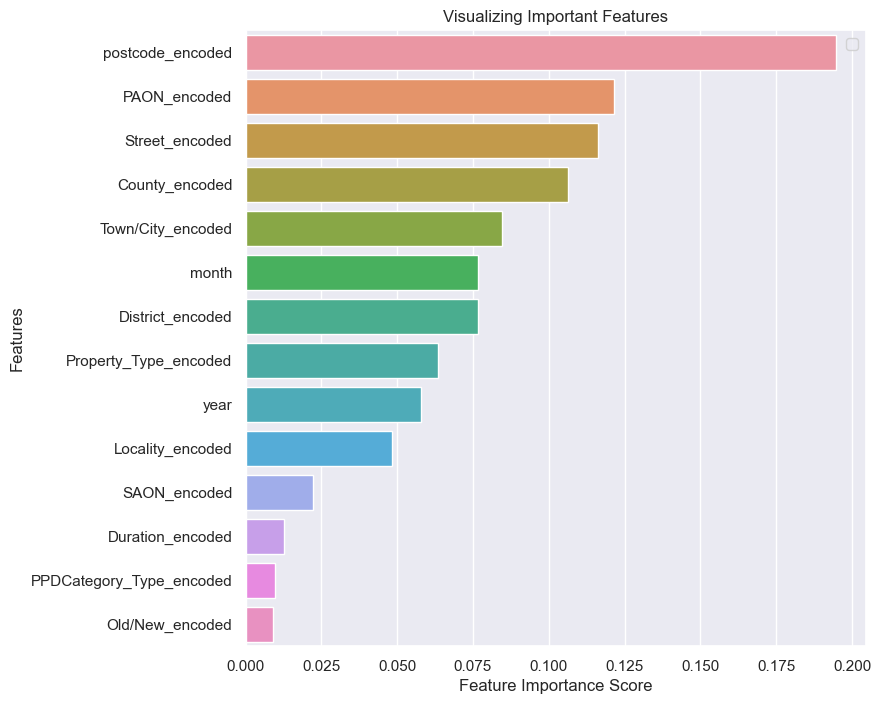

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# feature
feature_imp = pd.Series (clf.feature_importances_, index=X.columns). sort_values (ascending=False)
print (feature_imp)
sns.set(rc={'figure.figsize': (8,8)})
# Creating a bar plot
sns.barplot (x=feature_imp, y=feature_imp.index)
# Add Labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend ()
plt.show()

In [74]:
# print("=== Confusion Matrix ===")
# print(pd.DataFrame(confusion_matrix(X_test, x_prediction)))
# print('\n')
# print("=== Classification Report ===")
# print(classification_report(X_test, x_prediction))


# Generate the classification report for multiclass classification
report = classification_report(Y_test, x_prediction)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.77      0.77     75083
         1.0       0.65      0.70      0.68    100794
         2.0       0.57      0.48      0.52     62960
         3.0       0.73      0.75      0.74     65000

    accuracy                           0.68    303837
   macro avg       0.68      0.68      0.68    303837
weighted avg       0.68      0.68      0.68    303837



In [75]:
del clf

In [76]:
from xgboost import XGBClassifier
# Initialize the XGBoost classifier

Y = Y.astype(int)
print(Y.head())

Y_train = Y_train.astype(int)


xgb_classifier = XGBClassifier(n_estimators=1004, learning_rate=0.1, max_depth=3, random_state=121, n_jobs=-1)

# Fit the model to the training data
xgb_classifier.fit(X_train, Y_train)

xgb_prediction = xgb_classifier.predict(X_test)

0    2
1    1
2    0
3    1
4    0
Name: Target_Flag, dtype: int64


In [77]:
print('Accuracy : ', metrics.accuracy_score(Y_test,xgb_prediction))

Accuracy :  0.6266188778851819


In [78]:
# Generate the classification report
report = classification_report(Y_test, xgb_prediction)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.70      0.70     75083
         1.0       0.58      0.69      0.63    100794
         2.0       0.53      0.36      0.42     62960
         3.0       0.69      0.71      0.70     65000

    accuracy                           0.63    303837
   macro avg       0.62      0.61      0.61    303837
weighted avg       0.62      0.63      0.62    303837



Feature Importances:
 Property_Type_encoded       0.170592
County_encoded              0.163036
Duration_encoded            0.144857
PAON_encoded                0.083925
PPDCategory_Type_encoded    0.083243
postcode_encoded            0.074826
year                        0.068076
Old/New_encoded             0.061103
Town/City_encoded           0.047540
District_encoded            0.042541
SAON_encoded                0.029647
month                       0.013285
Locality_encoded            0.010941
Street_encoded              0.006390
dtype: float32


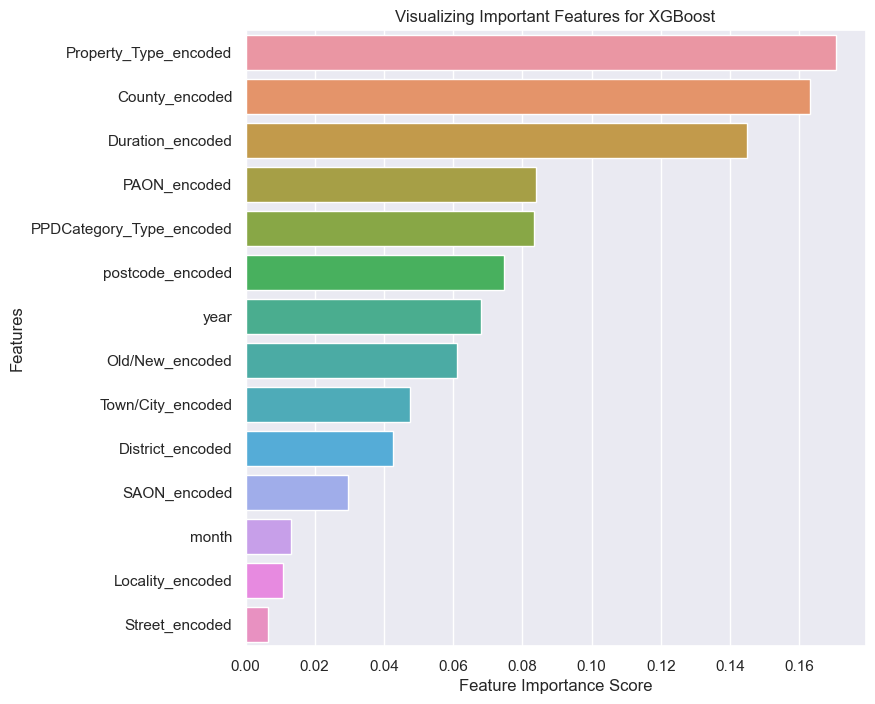

In [79]:
feature_imp = pd.Series(xgb_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print feature importances
print("Feature Importances:\n", feature_imp)

# Plotting the feature importances
sns.set(rc={'figure.figsize': (8, 8)})
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for XGBoost")
plt.show()

In [80]:
del xgb_classifier

In [81]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=164)

# Fit the model to the training data
logreg_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logreg_model.predict(X_test)


/Users/ironfeast/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# Measure accuracy
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.33893172984198766


In [83]:
# Generate the classification report
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

/Users/ironfeast/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ironfeast/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.28      0.02      0.04     75083
         1.0       0.34      0.90      0.49    100794
         2.0       0.00      0.00      0.00     62960
         3.0       0.33      0.17      0.22     65000

    accuracy                           0.34    303837
   macro avg       0.24      0.27      0.19    303837
weighted avg       0.25      0.34      0.22    303837



/Users/ironfeast/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Locality_encoded            1.516263e-05
County_encoded              4.501111e-07
year                        1.886312e-07
Town/City_encoded           1.036069e-07
Property_Type_encoded       7.351029e-08
Duration_encoded            1.174007e-08
PPDCategory_Type_encoded    1.009718e-08
postcode_encoded            3.339733e-09
Old/New_encoded            -5.406279e-09
month                      -1.202968e-08
Street_encoded             -1.844536e-08
District_encoded           -4.907101e-07
PAON_encoded               -4.124691e-06
SAON_encoded               -1.504605e-05
dtype: float64


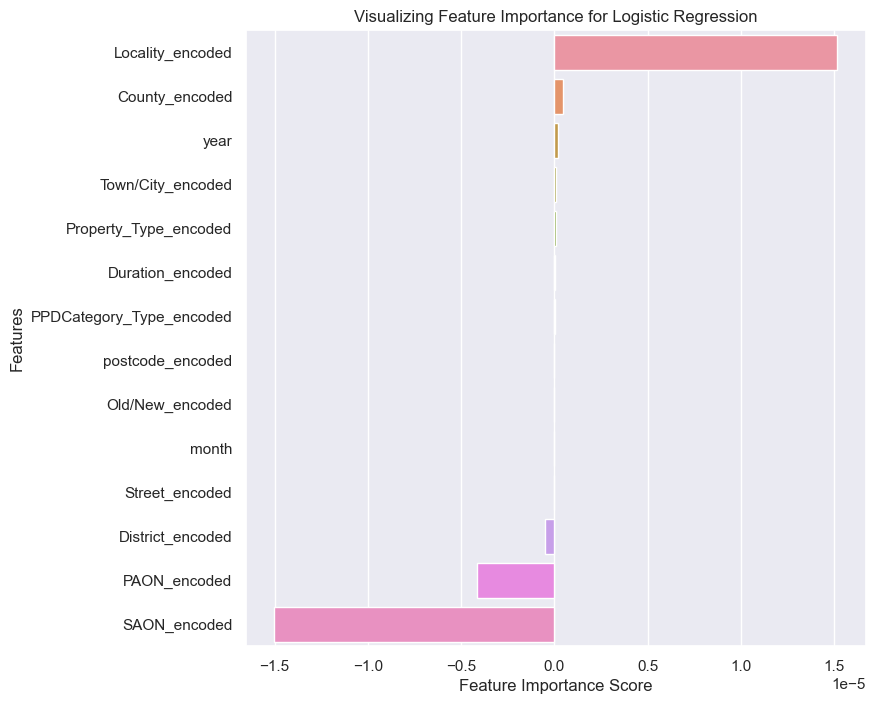

In [84]:
# Visualize feature importance
feature_imp = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
print(feature_imp)
sns.set(rc={'figure.figsize': (8, 8)})
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Feature Importance for Logistic Regression")
plt.show()

In [85]:
# del logreg_model

In [ ]:
# import lightgbm as lgb
# lgb_classifier = lgb.LGBMClassifier(n_estimators=891, learning_rate=0.01, max_depth=3, random_state=121)

# # Fit the model to the training data
# lgb_classifier.fit(X_train, Y_train)

# # Make predictions on the test set
# Y_pred = lgb_classifier.predict(X_test)

In [ ]:
# # Measure accuracy
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)

In [ ]:
# # Generate the classification report
# report = classification_report(Y_test, Y_pred)
# print("Classification Report:\n", report)


In [ ]:
# # Visualize feature importance
# feature_imp = pd.Series(lgb_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

# sns.set(rc={'figure.figsize': (8, 8)})
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Feature Importance for LightGBM")
# plt.show()